In [1]:
!pip install bertopic
!pip install pandas matplotlib wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import re

from bertopic import BERTopic
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

Saving Test-Data.csv to Test-Data (1).csv
Enter number of topics (press Enter for auto): 3
Enter words per topic (default 10): 8
Enter iterations (default 1): 5

Running BERTopic iteration 1...


Running BERTopic iteration 2...


Running BERTopic iteration 3...


Running BERTopic iteration 4...


Running BERTopic iteration 5...


Topic Summary:
    Topic  Count                        Name  \
0     -1    436        -1_day_just_new_life   
1      0    540        0_amp_happy_day_love   
2      1     23  1_bull_need_city_simulator   

                                      Representation  \
0  [day, just, new, life, good, make, help, today...   
1  [amp, happy, day, love, time, fathers, ur, jus...   
2  [bull, need, city, simulator, adapt, environme...   

                                 Representative_Docs  
0  [  sta the day off right ãââãââãâââãâââ  ãââ ã...  
1  [    amp  from         , i  r  2  2  2  amp 2 ...  
2  [   gorilla simulator you need to do to adapt ...  


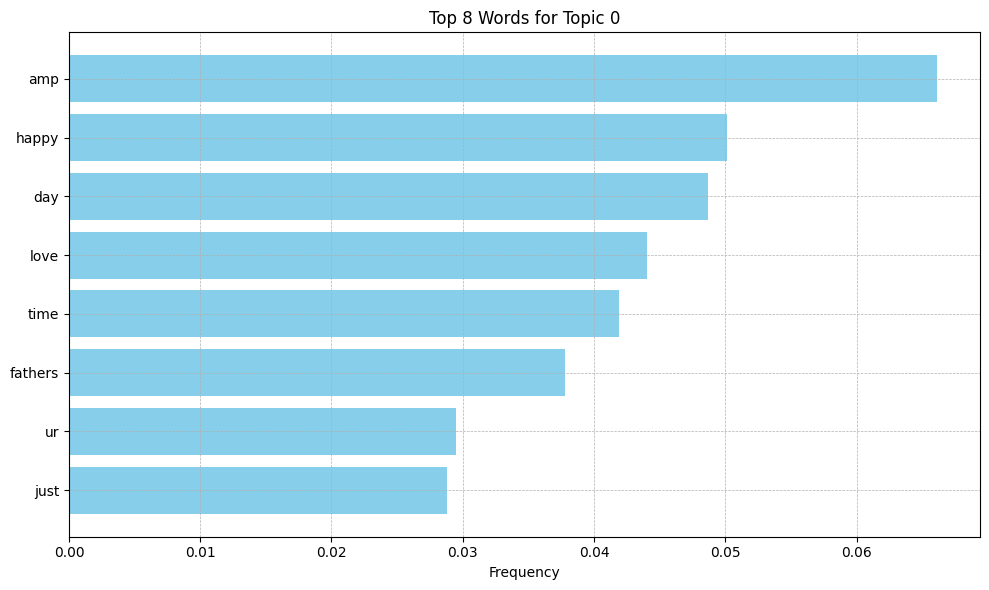

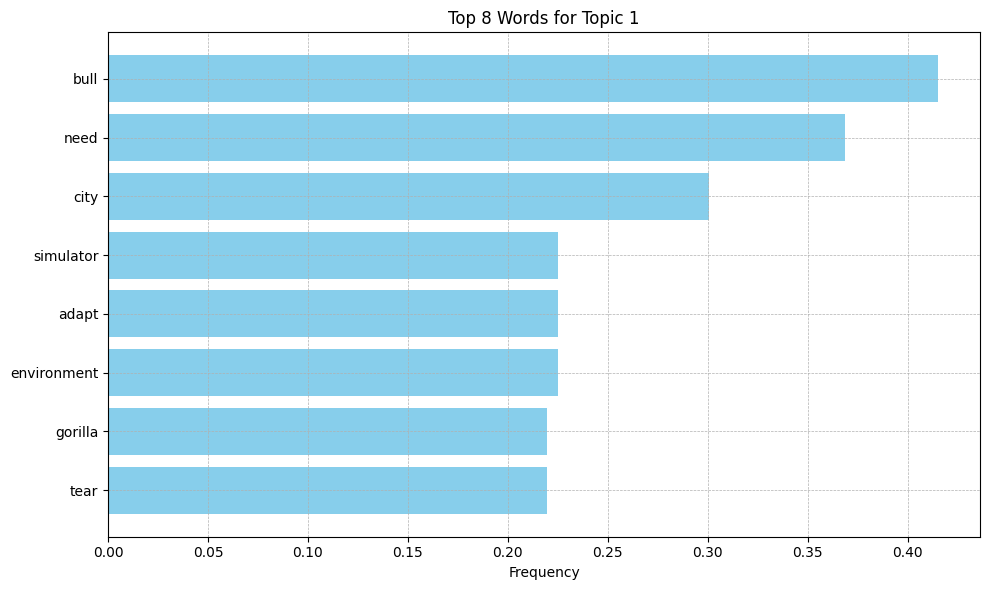

In [3]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df_pandas = pd.read_csv(file_name, encoding="ISO-8859-1")
df_pandas.columns = ["text"]
df_pandas["clean_text"] = df_pandas["text"].str.lower()
df_pandas["clean_text"] = df_pandas["clean_text"].apply(lambda x: re.sub(r"http\S+", "", x))
df_pandas["clean_text"] = df_pandas["clean_text"].apply(lambda x: re.sub(r"@\w+", "", x))
df_pandas["clean_text"] = df_pandas["clean_text"].apply(lambda x: re.sub(r"#\w+", "", x))
df_pandas["clean_text"] = df_pandas["clean_text"].apply(lambda x: re.sub(r"[^\w\s]", "", x))

# USER INPUTS
num_topics = input("Enter number of topics (press Enter for auto): ")
num_topics = int(num_topics) if num_topics.strip() else "auto"
words_per_topic = input("Enter words per topic (default 10): ")
words_per_topic = int(words_per_topic) if words_per_topic.strip() else 10
iterations = input("Enter iterations (default 1): ")
iterations = int(iterations) if iterations.strip() else 1
custom_stopwords = ["u", "am", "i", "in", "im", "should", "like", "one", "also", "get", "use", "see",
"going"]

all_stopwords = list(set(ENGLISH_STOP_WORDS).union(set(custom_stopwords)))
vectorizer = CountVectorizer(stop_words=all_stopwords)

# TRAIN THE BERTopic MODEL
topic_model = None
for i in range(iterations):
    print(f"\nRunning BERTopic iteration {i + 1}...\n")
    topic_model = BERTopic(
        language="english",
        nr_topics=num_topics,
        vectorizer_model=vectorizer,
        verbose=False
    )
    topics, probs = topic_model.fit_transform(df_pandas["clean_text"])

# SUMMARY OF TOPICS
valid_topics = [topic for topic in set(topics) if topic != -1]
if len(valid_topics) == 0:
    print("No valid topics were found. Please check your input or stopwords.")
else:
    print("\nTopic Summary:\n", topic_model.get_topic_info())
    df_pandas["topic"] = topics

# BAR GRAPH VISUALIZATION PER TOPIC
# Shows top N words (by frequency) per topic using a horizontal bar chart.
# This helps to understand what words dominate each discovered topic.

for topic_num in valid_topics:
    topic_words = topic_model.get_topic(topic_num)
    if topic_words:
        words = [word for word, _ in topic_words]
        freqs = [freq for _, freq in topic_words]
        plt.figure(figsize=(10, 6))
        plt.barh(words[:words_per_topic], freqs[:words_per_topic], color='skyblue')
        plt.xlabel('Frequency')
        plt.title(f"Top {words_per_topic} Words for Topic {topic_num}")
        plt.gca().invert_yaxis()
        plt.grid(True, linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()

Enter number of topics (press Enter for auto): 3
Enter words per topic (default 10): 8
Enter iterations (default 1): 10

Running BERTopic iteration 1...


Running BERTopic iteration 2...


Running BERTopic iteration 3...


Running BERTopic iteration 4...


Running BERTopic iteration 5...


Running BERTopic iteration 6...


Running BERTopic iteration 7...


Running BERTopic iteration 8...


Running BERTopic iteration 9...


Running BERTopic iteration 10...


Topic Summary:
    Topic  Count                     Name  \
0     -1    301  -1_poetry_just_day_help   
1      0    675    0_day_happy_time_love   
2      1     23   1_bull_need_city_adapt   

                                      Representation  \
0  [poetry, just, day, help, new, life, got, know...   
1  [day, happy, time, love, just, fathers, today,...   
2  [bull, need, city, adapt, simulator, environme...   

                                 Representative_Docs  
0  [sad or dukhi shairi  shairi  poetry   gazal n...  
1  [happy 

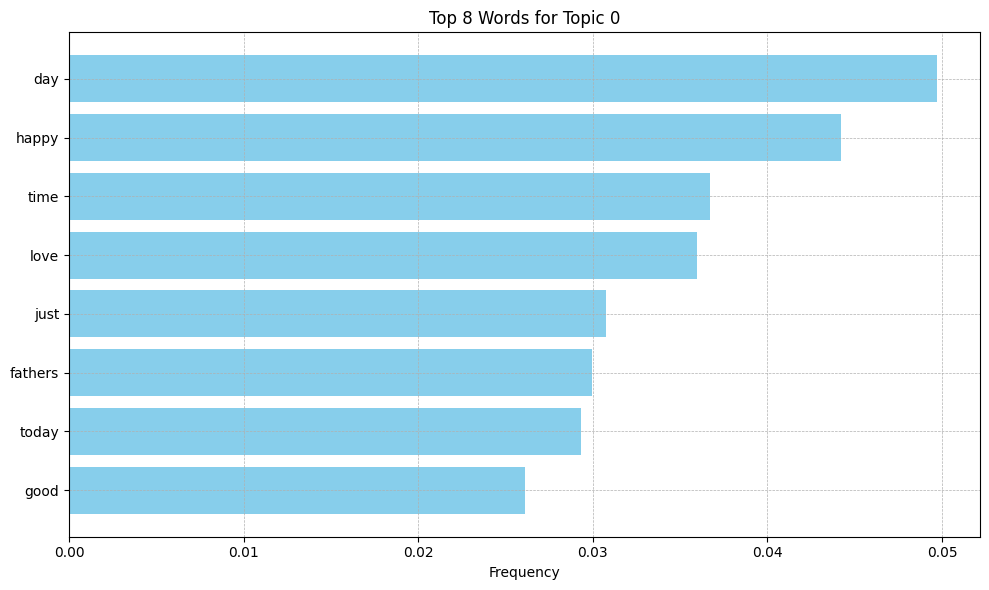

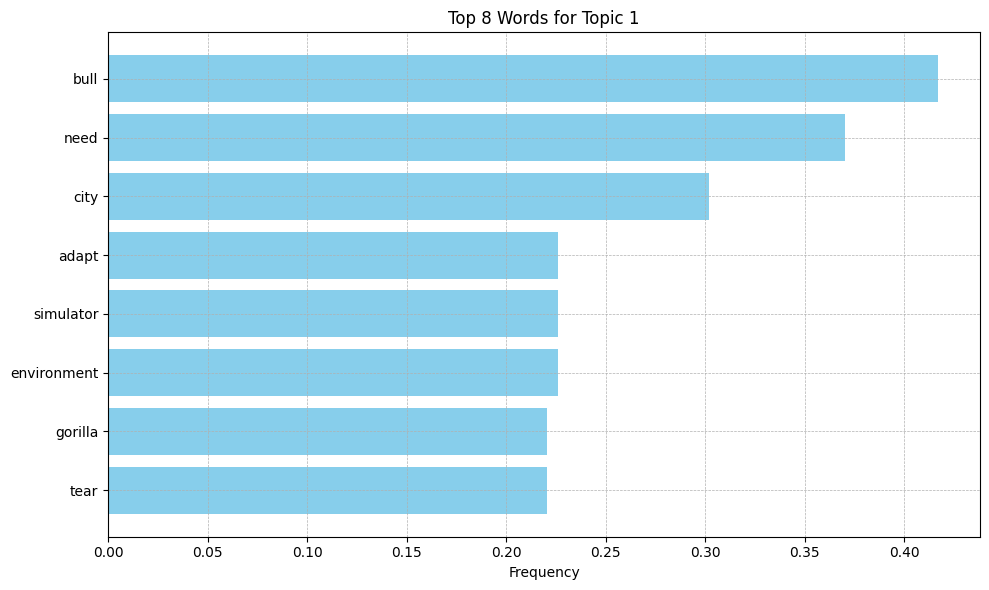

In [8]:
# USER INPUTS
num_topics = input("Enter number of topics (press Enter for auto): ")
num_topics = int(num_topics) if num_topics.strip() else "auto"
words_per_topic = input("Enter words per topic (default 10): ")
words_per_topic = int(words_per_topic) if words_per_topic.strip() else 10
iterations = input("Enter iterations (default 1): ")
iterations = int(iterations) if iterations.strip() else 1
custom_stopwords = ["u", "am", "i", "in", "im", "should", "like", "one", "also", "get", "use", "see",  "amp", "lt3"
"going"]

all_stopwords = list(set(ENGLISH_STOP_WORDS).union(set(custom_stopwords)))
vectorizer = CountVectorizer(stop_words=all_stopwords)

# TRAIN THE BERTopic MODEL
topic_model = None
for i in range(iterations):
    print(f"\nRunning BERTopic iteration {i + 1}...\n")
    topic_model = BERTopic(
        language="english",
        nr_topics=num_topics,
        vectorizer_model=vectorizer,
        verbose=False
    )
    topics, probs = topic_model.fit_transform(df_pandas["clean_text"])

# SUMMARY OF TOPICS
valid_topics = [topic for topic in set(topics) if topic != -1]
if len(valid_topics) == 0:
    print("No valid topics were found. Please check your input or stopwords.")
else:
    print("\nTopic Summary:\n", topic_model.get_topic_info())
    df_pandas["topic"] = topics

# BAR GRAPH VISUALIZATION PER TOPIC
# Shows top N words (by frequency) per topic using a horizontal bar chart.
# This helps to understand what words dominate each discovered topic.

for topic_num in valid_topics:
    topic_words = topic_model.get_topic(topic_num)
    if topic_words:
        words = [word for word, _ in topic_words]
        freqs = [freq for _, freq in topic_words]
        plt.figure(figsize=(10, 6))
        plt.barh(words[:words_per_topic], freqs[:words_per_topic], color='skyblue')
        plt.xlabel('Frequency')
        plt.title(f"Top {words_per_topic} Words for Topic {topic_num}")
        plt.gca().invert_yaxis()
        plt.grid(True, linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()

Enter number of topics (press Enter for auto): 3
Enter words per topic (default 10): 5
Enter iterations (default 1): 8

Running BERTopic iteration 1...


Running BERTopic iteration 2...


Running BERTopic iteration 3...


Running BERTopic iteration 4...


Running BERTopic iteration 5...


Running BERTopic iteration 6...


Running BERTopic iteration 7...


Running BERTopic iteration 8...


Topic Summary:
    Topic  Count                    Name  \
0     -1    383  -1_day_just_poetry_new   
1      0    593   0_day_happy_love_time   
2      1     23  1_bull_need_city_adapt   

                                      Representation  \
0  [day, just, poetry, new, today, life, happy, g...   
1  [day, happy, love, time, fathers, just, good, ...   
2  [bull, need, city, adapt, simulator, environme...   

                                 Representative_Docs  
0  [its going to be a great day the day itself do...  
1  [  happy shootingãâââãââãââãââãââãâââãââãâââãâ...  
2  [   gorilla simulator you 

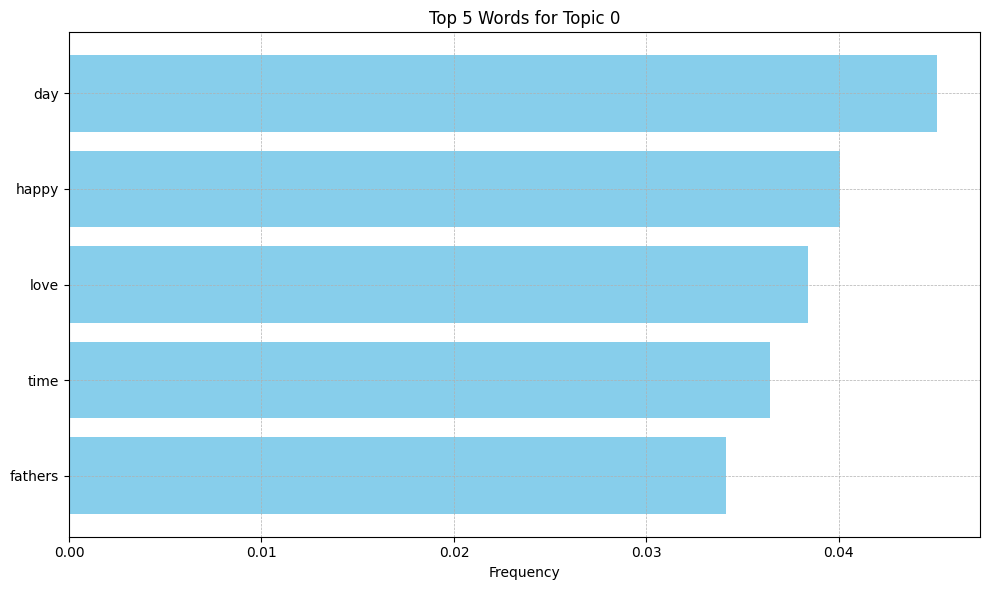

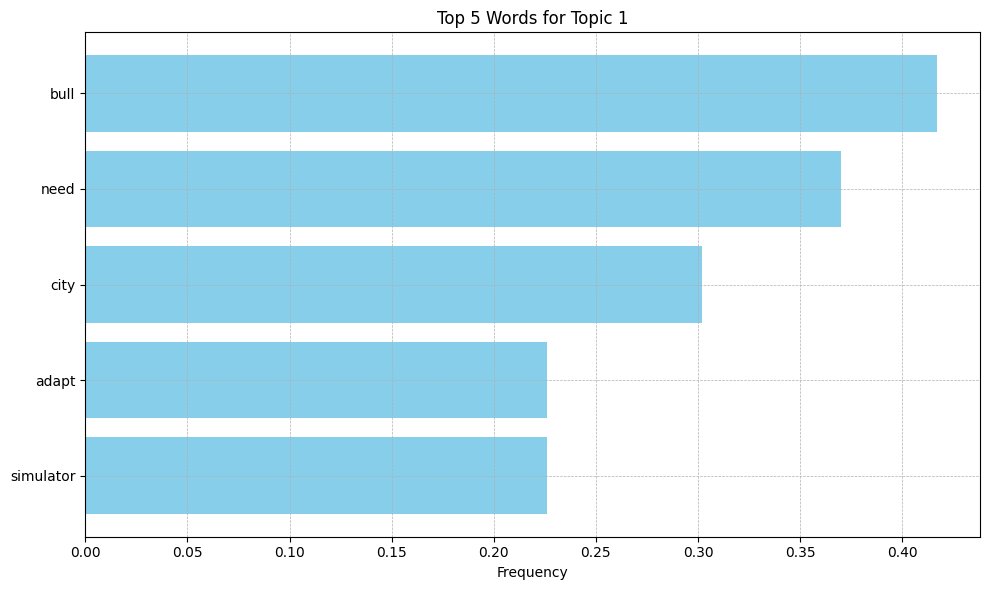

In [10]:
# USER INPUTS
num_topics = input("Enter number of topics (press Enter for auto): ")
num_topics = int(num_topics) if num_topics.strip() else "auto"
words_per_topic = input("Enter words per topic (default 10): ")
words_per_topic = int(words_per_topic) if words_per_topic.strip() else 10
iterations = input("Enter iterations (default 1): ")
iterations = int(iterations) if iterations.strip() else 1
custom_stopwords = ["u", "am", "i", "in", "im", "should", "like", "one", "also", "get", "use", "see",  "amp", "lt3"
"going"]

all_stopwords = list(set(ENGLISH_STOP_WORDS).union(set(custom_stopwords)))
vectorizer = CountVectorizer(stop_words=all_stopwords)

# TRAIN THE BERTopic MODEL
topic_model = None
for i in range(iterations):
    print(f"\nRunning BERTopic iteration {i + 1}...\n")
    topic_model = BERTopic(
        language="english",
        nr_topics=num_topics,
        vectorizer_model=vectorizer,
        verbose=False
    )
    topics, probs = topic_model.fit_transform(df_pandas["clean_text"])

# SUMMARY OF TOPICS
valid_topics = [topic for topic in set(topics) if topic != -1]
if len(valid_topics) == 0:
    print("No valid topics were found. Please check your input or stopwords.")
else:
    print("\nTopic Summary:\n", topic_model.get_topic_info())
    df_pandas["topic"] = topics

# BAR GRAPH VISUALIZATION PER TOPIC
# Shows top N words (by frequency) per topic using a horizontal bar chart.
# This helps to understand what words dominate each discovered topic.

for topic_num in valid_topics:
    topic_words = topic_model.get_topic(topic_num)
    if topic_words:
        words = [word for word, _ in topic_words]
        freqs = [freq for _, freq in topic_words]
        plt.figure(figsize=(10, 6))
        plt.barh(words[:words_per_topic], freqs[:words_per_topic], color='skyblue')
        plt.xlabel('Frequency')
        plt.title(f"Top {words_per_topic} Words for Topic {topic_num}")
        plt.gca().invert_yaxis()
        plt.grid(True, linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()

Enter number of topics (press Enter for auto): 5
Enter words per topic (default 10): 5
Enter iterations (default 1): 8

Running BERTopic iteration 1...


Running BERTopic iteration 2...


Running BERTopic iteration 3...


Running BERTopic iteration 4...


Running BERTopic iteration 5...


Running BERTopic iteration 6...


Running BERTopic iteration 7...


Running BERTopic iteration 8...


Topic Summary:
    Topic  Count                      Name  \
0     -1    336    -1_day_poetry_new_just   
1      0    463  0_happy_love_day_fathers   
2      1    126   1_trump_people_old_just   
3      2     51     2_lt3_music_band_song   
4      3     23    3_bull_need_city_adapt   

                                      Representation  \
0  [day, poetry, new, just, good, today, got, hap...   
1  [happy, love, day, fathers, time, ur, thankful...   
2  [trump, people, old, just, racist, black, dont...   
3  [lt3, music, band, song, dave, definitely, mak...   
4  [bull, need, city, adapt, simulator, e

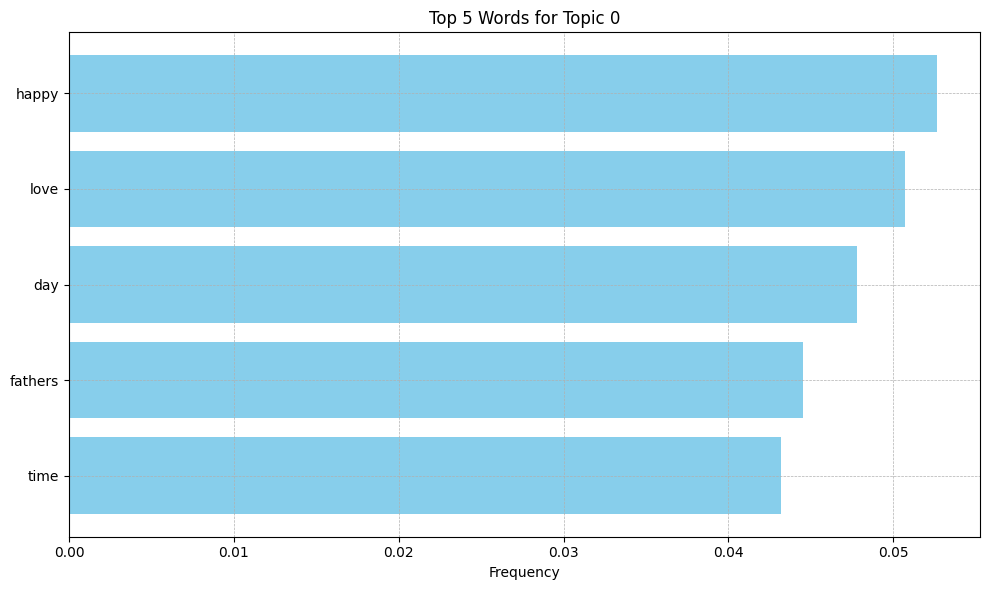

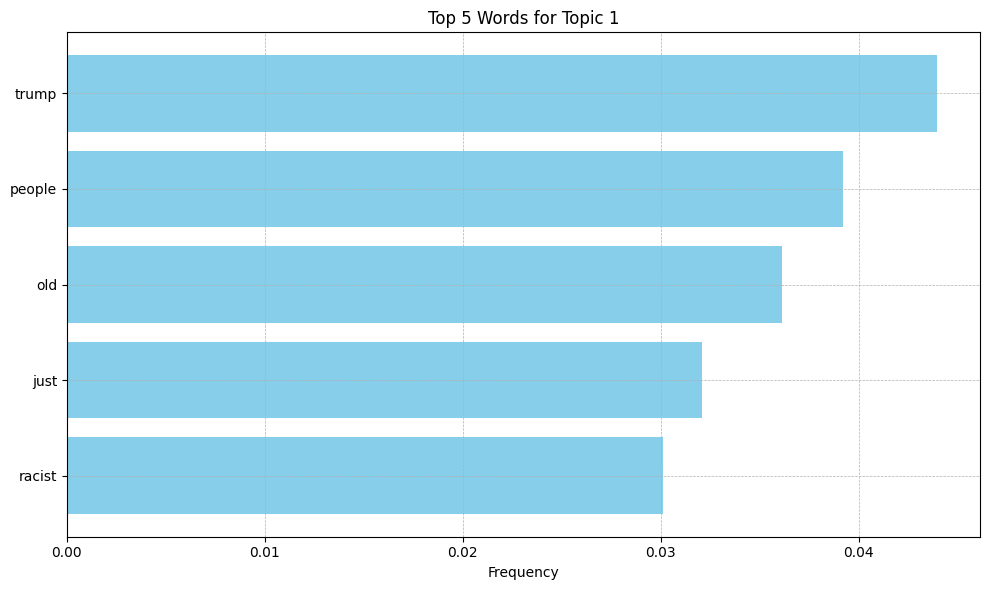

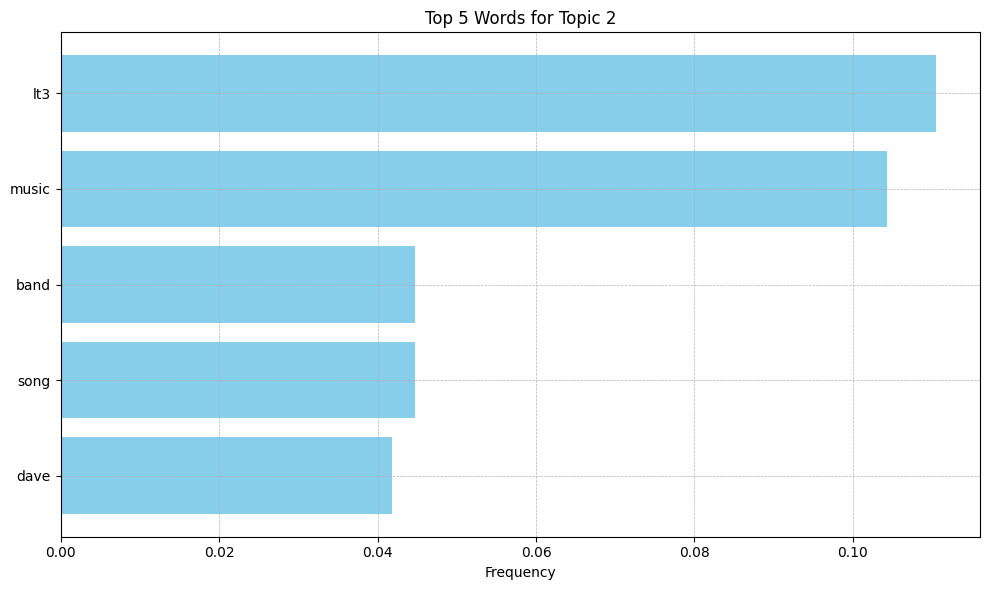

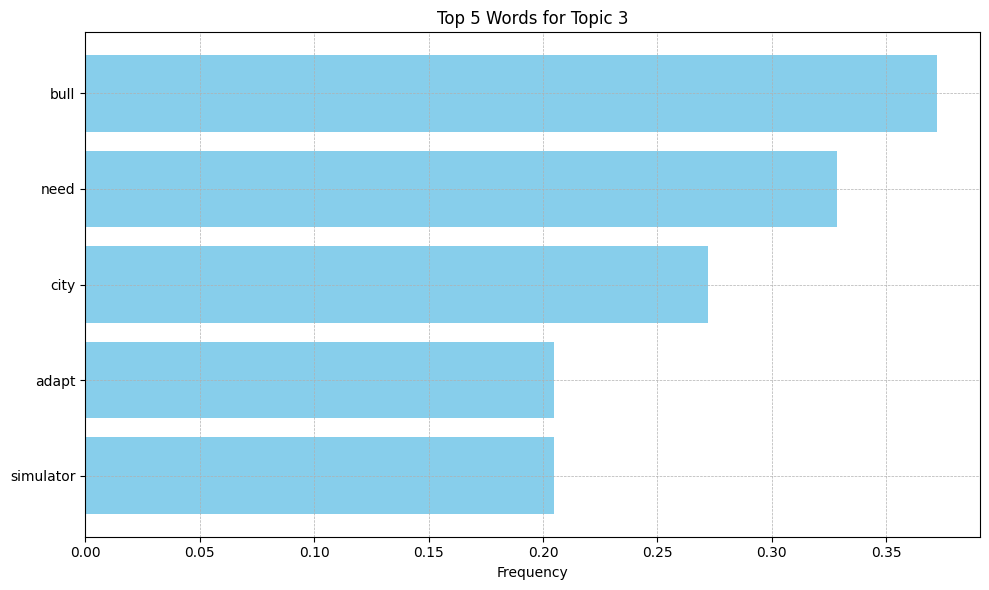

In [12]:
# USER INPUTS
num_topics = input("Enter number of topics (press Enter for auto): ")
num_topics = int(num_topics) if num_topics.strip() else "auto"
words_per_topic = input("Enter words per topic (default 10): ")
words_per_topic = int(words_per_topic) if words_per_topic.strip() else 10
iterations = input("Enter iterations (default 1): ")
iterations = int(iterations) if iterations.strip() else 1
custom_stopwords = ["u", "am", "i", "in", "im", "should", "like", "one", "also", "get", "use", "see", "amp", "lt1"
"going"]

all_stopwords = list(set(ENGLISH_STOP_WORDS).union(set(custom_stopwords)))
vectorizer = CountVectorizer(stop_words=all_stopwords)

# TRAIN THE BERTopic MODEL
topic_model = None
for i in range(iterations):
    print(f"\nRunning BERTopic iteration {i + 1}...\n")
    topic_model = BERTopic(
        language="english",
        nr_topics=num_topics,
        vectorizer_model=vectorizer,
        verbose=False
    )
    topics, probs = topic_model.fit_transform(df_pandas["clean_text"])

# SUMMARY OF TOPICS
valid_topics = [topic for topic in set(topics) if topic != -1]
if len(valid_topics) == 0:
    print("No valid topics were found. Please check your input or stopwords.")
else:
    print("\nTopic Summary:\n", topic_model.get_topic_info())
    df_pandas["topic"] = topics

# BAR GRAPH VISUALIZATION PER TOPIC
# Shows top N words (by frequency) per topic using a horizontal bar chart.
# This helps to understand what words dominate each discovered topic.

for topic_num in valid_topics:
    topic_words = topic_model.get_topic(topic_num)
    if topic_words:
        words = [word for word, _ in topic_words]
        freqs = [freq for _, freq in topic_words]
        plt.figure(figsize=(10, 6))
        plt.barh(words[:words_per_topic], freqs[:words_per_topic], color='skyblue')
        plt.xlabel('Frequency')
        plt.title(f"Top {words_per_topic} Words for Topic {topic_num}")
        plt.gca().invert_yaxis()
        plt.grid(True, linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()

Enter number of topics (press Enter for auto): 10
Enter words per topic (default 10): 15
Enter iterations (default 1): 15

Running BERTopic iteration 1...


Running BERTopic iteration 2...


Running BERTopic iteration 3...


Running BERTopic iteration 4...


Running BERTopic iteration 5...


Running BERTopic iteration 6...


Running BERTopic iteration 7...


Running BERTopic iteration 8...


Running BERTopic iteration 9...


Running BERTopic iteration 10...


Running BERTopic iteration 11...


Running BERTopic iteration 12...


Running BERTopic iteration 13...


Running BERTopic iteration 14...


Running BERTopic iteration 15...


Topic Summary:
    Topic  Count                                          Name  \
0     -1    404                        -1_day_poetry_just_new   
1      0    253                         0_time_ur_love_bihday   
2      1    129                     1_trump_people_old_racist   
3      2     54              2_happiness_life_thrilling_happy   
4      3     51     

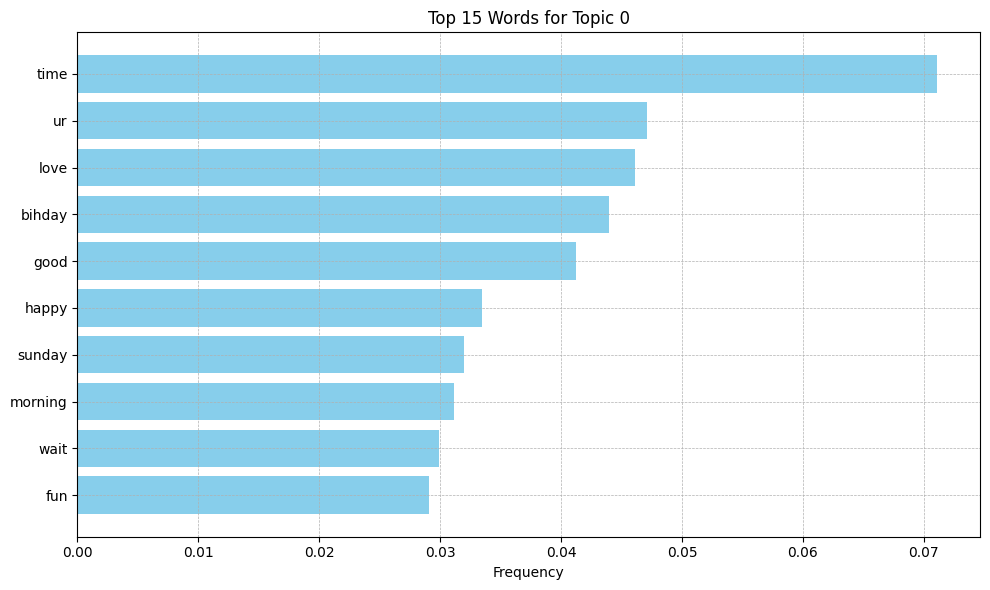

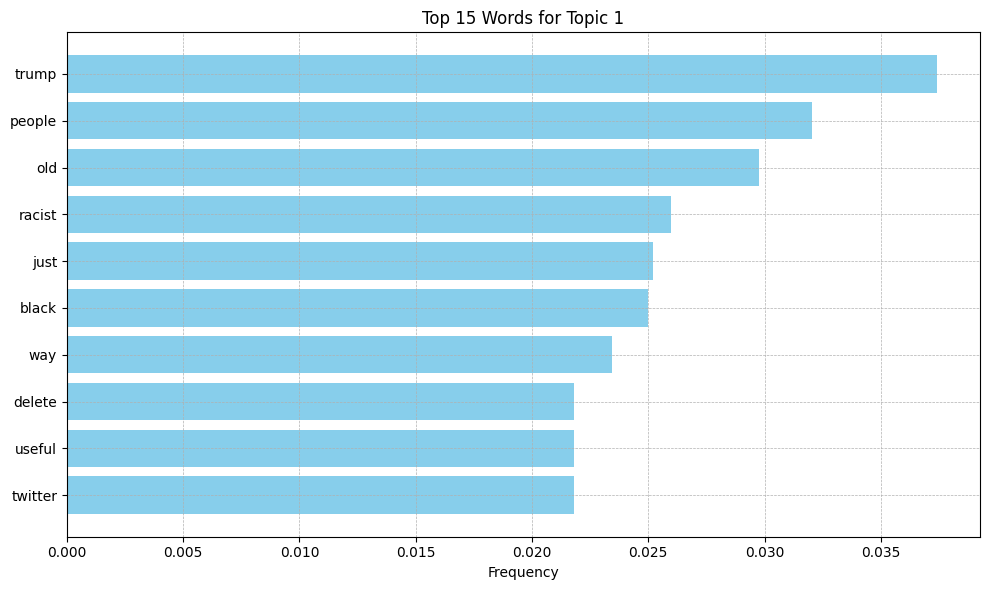

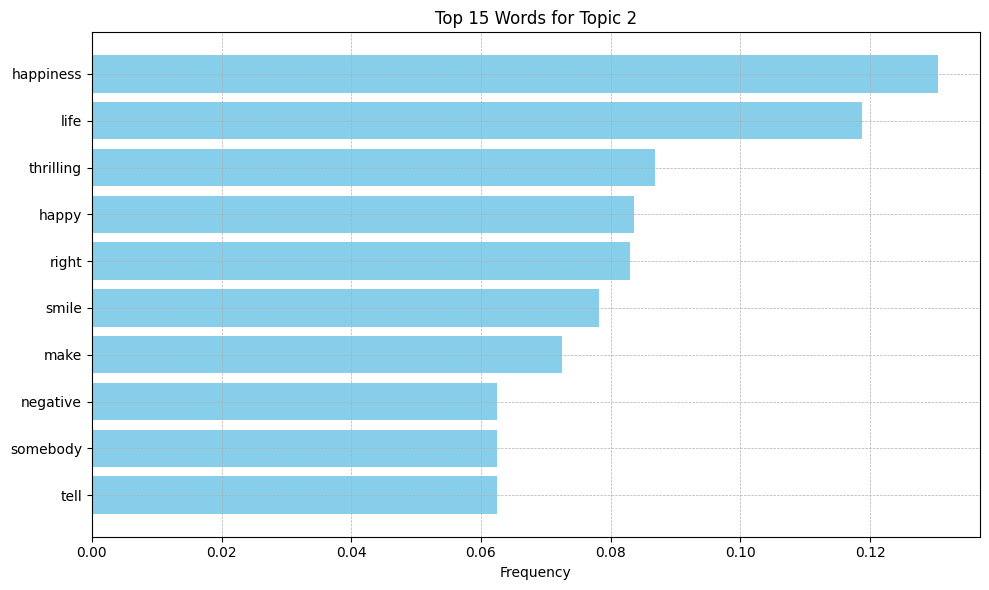

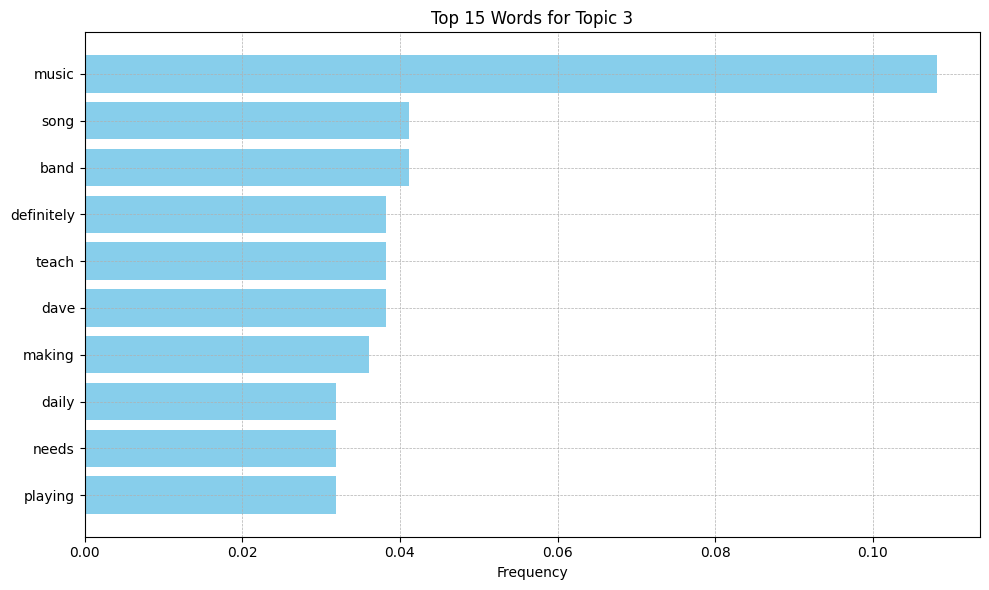

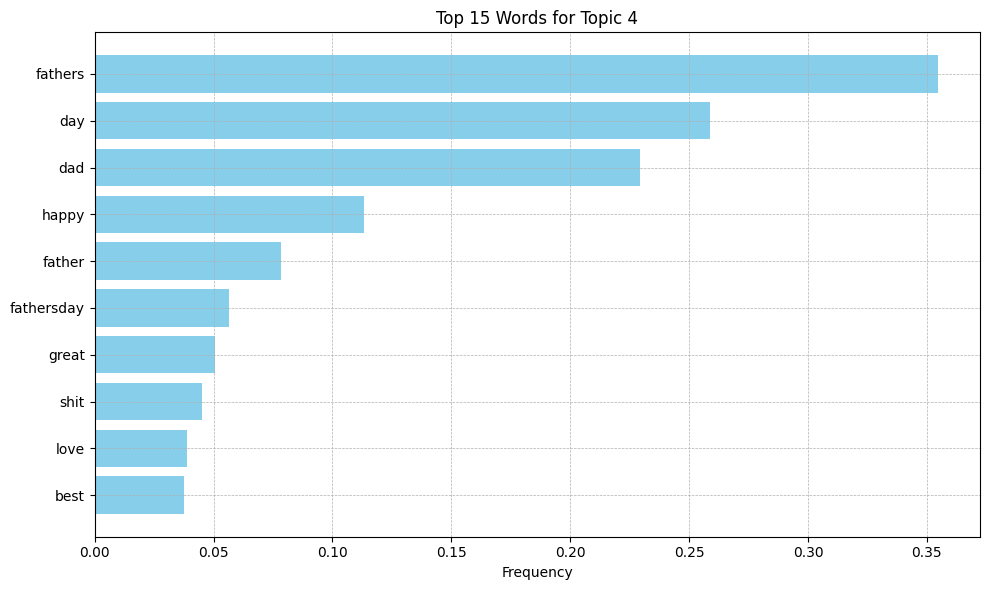

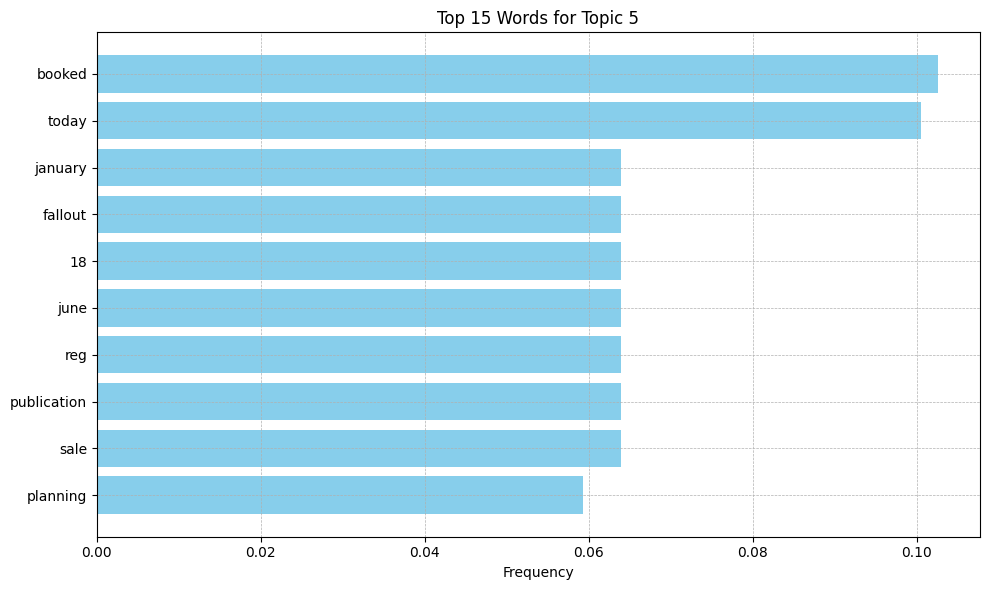

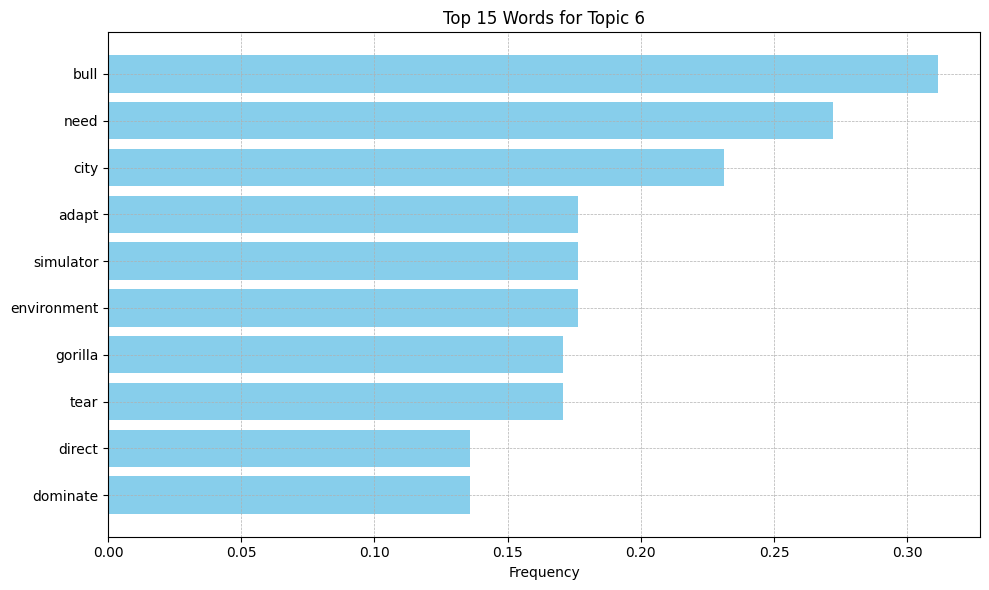

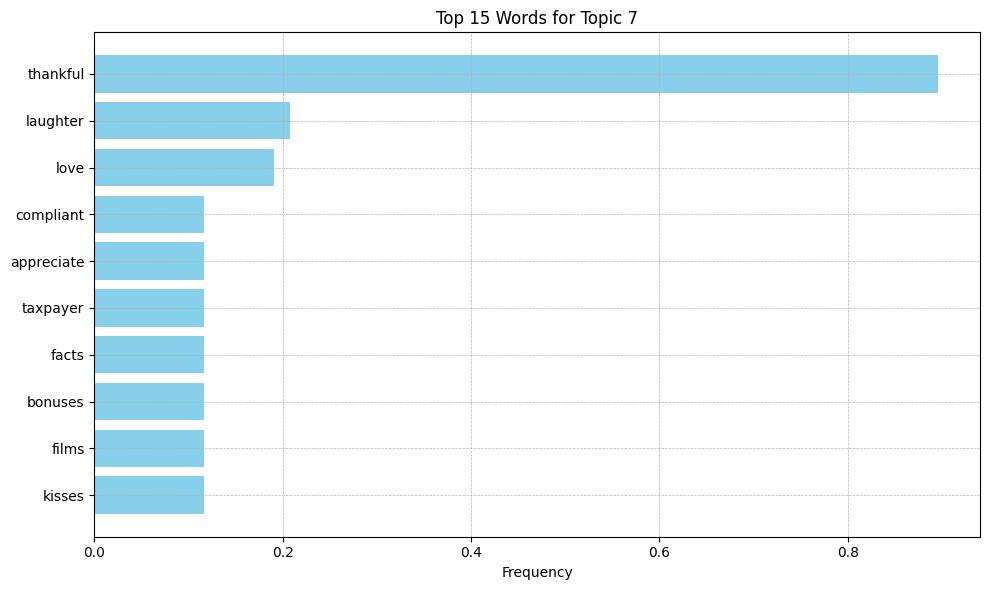

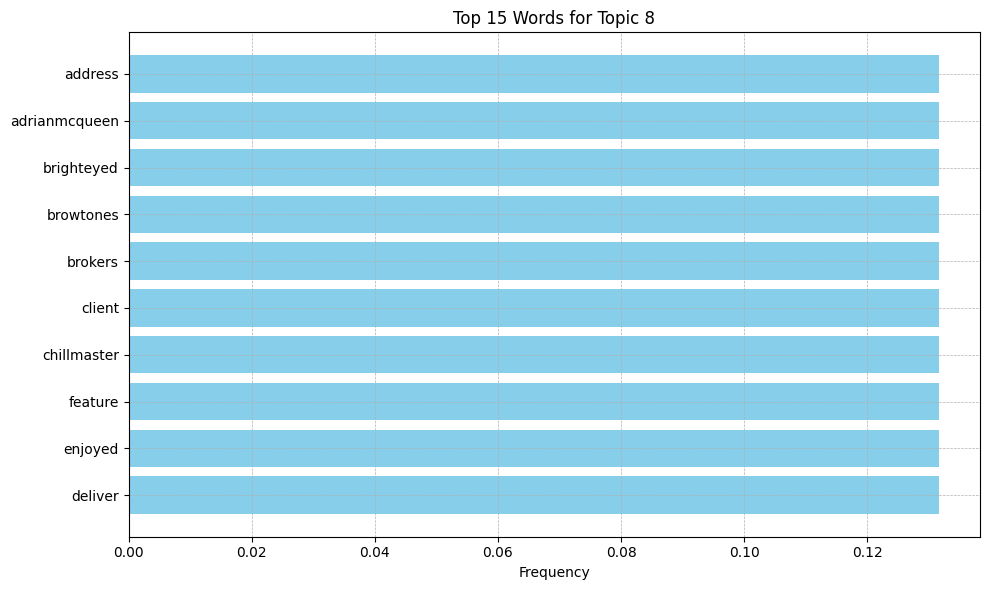

In [13]:
# USER INPUTS
num_topics = input("Enter number of topics (press Enter for auto): ")
num_topics = int(num_topics) if num_topics.strip() else "auto"
words_per_topic = input("Enter words per topic (default 10): ")
words_per_topic = int(words_per_topic) if words_per_topic.strip() else 10
iterations = input("Enter iterations (default 1): ")
iterations = int(iterations) if iterations.strip() else 1
custom_stopwords = ["u", "am", "i", "in", "im", "should", "like", "one", "also", "get", "use", "see", "amp", "lt3",
"going"]

all_stopwords = list(set(ENGLISH_STOP_WORDS).union(set(custom_stopwords)))
vectorizer = CountVectorizer(stop_words=all_stopwords)

# TRAIN THE BERTopic MODEL
topic_model = None
for i in range(iterations):
    print(f"\nRunning BERTopic iteration {i + 1}...\n")
    topic_model = BERTopic(
        language="english",
        nr_topics=num_topics,
        vectorizer_model=vectorizer,
        verbose=False
    )
    topics, probs = topic_model.fit_transform(df_pandas["clean_text"])

# SUMMARY OF TOPICS
valid_topics = [topic for topic in set(topics) if topic != -1]
if len(valid_topics) == 0:
    print("No valid topics were found. Please check your input or stopwords.")
else:
    print("\nTopic Summary:\n", topic_model.get_topic_info())
    df_pandas["topic"] = topics

# BAR GRAPH VISUALIZATION PER TOPIC
# Shows top N words (by frequency) per topic using a horizontal bar chart.
# This helps to understand what words dominate each discovered topic.

for topic_num in valid_topics:
    topic_words = topic_model.get_topic(topic_num)
    if topic_words:
        words = [word for word, _ in topic_words]
        freqs = [freq for _, freq in topic_words]
        plt.figure(figsize=(10, 6))
        plt.barh(words[:words_per_topic], freqs[:words_per_topic], color='skyblue')
        plt.xlabel('Frequency')
        plt.title(f"Top {words_per_topic} Words for Topic {topic_num}")
        plt.gca().invert_yaxis()
        plt.grid(True, linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()

In [ ]:
#At this point, we can infer that the best combination are those that utilizes higher parameters, such as (15, 15, 15)
#for topics, words, and iterations respectively.
#this accounts the context of the topic in a clearer and broader overview.